# Credit Card Data Mining, Visualization and Transaction Classification

In [1]:
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

In [2]:
from os import listdir
from os.path import isfile, join
listdir('C:/Users/Arif/NLP/datasets_creditcard_2009')

['DataminingContest2009.Task1.CV1.Test.Inputs',
 'DataminingContest2009.Task1.CV1.Test.Targets',
 'DataminingContest2009.Task1.CV1.Train.Inputs',
 'DataminingContest2009.Task1.CV1.Train.Targets',
 'DataminingContest2009.Task1.CV10.Test.Inputs',
 'DataminingContest2009.Task1.CV10.Test.Targets',
 'DataminingContest2009.Task1.CV10.Train.Inputs',
 'DataminingContest2009.Task1.CV10.Train.Targets',
 'DataminingContest2009.Task1.CV2.Test.Inputs',
 'DataminingContest2009.Task1.CV2.Test.Targets',
 'DataminingContest2009.Task1.CV2.Train.Inputs',
 'DataminingContest2009.Task1.CV2.Train.Targets',
 'DataminingContest2009.Task1.CV3.Test.Inputs',
 'DataminingContest2009.Task1.CV3.Test.Targets',
 'DataminingContest2009.Task1.CV3.Train.Inputs',
 'DataminingContest2009.Task1.CV3.Train.Targets',
 'DataminingContest2009.Task1.CV4.Test.Inputs',
 'DataminingContest2009.Task1.CV4.Test.Targets',
 'DataminingContest2009.Task1.CV4.Train.Inputs',
 'DataminingContest2009.Task1.CV4.Train.Targets',
 'DataminingCont

## Data Reading From the files and combine in Pandas DataFrame

In [3]:
traindata = []
testdata = []
file='C:/Users/Arif/NLP/datasets_creditcard_2009/DataminingContest2009.Task1.CV'
for i in range(1,11): # for two files
    file_name1 = file + str(i) + '.Train.Inputs'
    file_name2 = file + str(i) + '.Test.Inputs'
    print ("Reading File :", file_name1)
    with open(file_name1) as f1:
        next(f1)
        for line1 in f1:
            traindata.append(line1.strip())
    print ("Reading File :", file_name2)
    with open(file_name2) as f2:
        next(f2)
        for line2 in f2:
            testdata.append(line2.strip())

Reading File : C:/Users/Arif/NLP/datasets_creditcard_2009/DataminingContest2009.Task1.CV1.Train.Inputs
Reading File : C:/Users/Arif/NLP/datasets_creditcard_2009/DataminingContest2009.Task1.CV1.Test.Inputs
Reading File : C:/Users/Arif/NLP/datasets_creditcard_2009/DataminingContest2009.Task1.CV2.Train.Inputs
Reading File : C:/Users/Arif/NLP/datasets_creditcard_2009/DataminingContest2009.Task1.CV2.Test.Inputs
Reading File : C:/Users/Arif/NLP/datasets_creditcard_2009/DataminingContest2009.Task1.CV3.Train.Inputs
Reading File : C:/Users/Arif/NLP/datasets_creditcard_2009/DataminingContest2009.Task1.CV3.Test.Inputs
Reading File : C:/Users/Arif/NLP/datasets_creditcard_2009/DataminingContest2009.Task1.CV4.Train.Inputs
Reading File : C:/Users/Arif/NLP/datasets_creditcard_2009/DataminingContest2009.Task1.CV4.Test.Inputs
Reading File : C:/Users/Arif/NLP/datasets_creditcard_2009/DataminingContest2009.Task1.CV5.Train.Inputs
Reading File : C:/Users/Arif/NLP/datasets_creditcard_2009/DataminingContest20

In [4]:
traintarget = []
testtarget = []
file='C:/Users/Arif/NLP/datasets_creditcard_2009/DataminingContest2009.Task1.CV'
for i in range(1,11): # for two files
    file_name3 = file + str(i) + '.Train.Targets'
    file_name4 = file + str(i) + '.Test.Targets'
    print ("Reading File :", file_name3)
    with open(file_name3) as f3:
        for line3 in f3:
            traintarget.append(line3.strip())
    print ("Reading File :", file_name4)
    with open(file_name4) as f4:
        for line4 in f4:
            testtarget.append(line4.strip())

Reading File : C:/Users/Arif/NLP/datasets_creditcard_2009/DataminingContest2009.Task1.CV1.Train.Targets
Reading File : C:/Users/Arif/NLP/datasets_creditcard_2009/DataminingContest2009.Task1.CV1.Test.Targets
Reading File : C:/Users/Arif/NLP/datasets_creditcard_2009/DataminingContest2009.Task1.CV2.Train.Targets
Reading File : C:/Users/Arif/NLP/datasets_creditcard_2009/DataminingContest2009.Task1.CV2.Test.Targets
Reading File : C:/Users/Arif/NLP/datasets_creditcard_2009/DataminingContest2009.Task1.CV3.Train.Targets
Reading File : C:/Users/Arif/NLP/datasets_creditcard_2009/DataminingContest2009.Task1.CV3.Test.Targets
Reading File : C:/Users/Arif/NLP/datasets_creditcard_2009/DataminingContest2009.Task1.CV4.Train.Targets
Reading File : C:/Users/Arif/NLP/datasets_creditcard_2009/DataminingContest2009.Task1.CV4.Test.Targets
Reading File : C:/Users/Arif/NLP/datasets_creditcard_2009/DataminingContest2009.Task1.CV5.Train.Targets
Reading File : C:/Users/Arif/NLP/datasets_creditcard_2009/Datamining

In [5]:
len(traindata), traindata[0:1]

(852138, ['12.95,0,CA,925,3,AOL.COM,1,0,1,12.95,-4276,7,0,1,0,1,1,0,1'])

In [6]:
traindata[-1]

'38.85,19,AZ,857,2,AOL.COM,0,19,0,38.85,-676,8,2,0,0,1,1,0,4'

In [7]:
train_data=pd.DataFrame(sub.split(",") for sub in traindata)
test_data=pd.DataFrame(sub.split(",") for sub in testdata)

In [8]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,12.95,0,CA,925,3,AOL.COM,1,0,1,12.95,-4276,7,0,1,0,1,1,0,1
1,11.01,0,CA,925,3,AOL.COM,1,0,1,11.01,-4276,7,0,1,0,1,1,0,1
2,38.85,0,CA,928,3,HOTMAIL.COM,1,0,0,38.85,2602,21,1,0,0,0,0,0,1
3,25.9,0,NJ,77,0,AOL.COM,1,0,0,25.9,4139,6,0,0,0,1,1,0,1
4,12.95,0,CA,945,3,YAHOO.COM,0,0,1,12.95,3826,9,1,0,0,1,0,0,1


In [9]:
train_target=pd.DataFrame(traintarget)
test_target=pd.DataFrame(testtarget)

In [10]:
train_data.columns = ['amount','hour1','state1','zip1','field1','domain1','field2','hour2','flag1','total','field3','field4','field5','indicator1','indicator2','flag2','flag3','flag4','flag5']
test_data.columns = ['amount','hour1','state1','zip1','field1','domain1','field2','hour2','flag1','total','field3','field4','field5','indicator1','indicator2','flag2','flag3','flag4','flag5']

In [11]:
train_data.head()

,amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5
0,12.95,0,CA,925,3,AOL.COM,1,0,1,12.95,-4276,7,0,1,0,1,1,0,1
1,11.01,0,CA,925,3,AOL.COM,1,0,1,11.01,-4276,7,0,1,0,1,1,0,1
2,38.85,0,CA,928,3,HOTMAIL.COM,1,0,0,38.85,2602,21,1,0,0,0,0,0,1
3,25.9,0,NJ,77,0,AOL.COM,1,0,0,25.9,4139,6,0,0,0,1,1,0,1
4,12.95,0,CA,945,3,YAHOO.COM,0,0,1,12.95,3826,9,1,0,0,1,0,0,1


In [12]:
len(train_data), len(test_data)

(852138, 94682)

In [13]:
train_target.head()

,0
0,0
1,0
2,0
3,0
4,0


In [15]:
train_target.columns = ['label']
test_target.columns = ['label']

In [16]:
len(train_data), len(test_data), len(train_target), len(test_target)

(852138, 94682, 852138, 94682)

In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852138 entries, 0 to 852137
Data columns (total 19 columns):
amount        852138 non-null object
hour1         852138 non-null object
state1        852138 non-null object
zip1          852138 non-null object
field1        852138 non-null object
domain1       852138 non-null object
field2        852138 non-null object
hour2         852138 non-null object
flag1         852138 non-null object
total         852138 non-null object
field3        852138 non-null object
field4        852138 non-null object
field5        852138 non-null object
indicator1    852138 non-null object
indicator2    852138 non-null object
flag2         852138 non-null object
flag3         852138 non-null object
flag4         852138 non-null object
flag5         852138 non-null object
dtypes: object(19)
memory usage: 123.5+ MB


In [26]:
#train_data = train_data.apply(pd.to_numeric)
train_data["amount"] = train_data["amount"].apply(pd.to_numeric)

In [27]:
train_data['amount'].groupby(train_data['state1']).describe().sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
state1,,,,,,,,
CA,168084.0,26.189845,14.171889,0.00,12.95,25.90,38.85,95.40
FL,75924.0,25.292438,14.016518,0.00,12.95,20.72,38.85,95.40
TX,59580.0,25.964218,14.204004,0.00,12.95,25.90,38.85,95.40
NY,52155.0,26.317745,14.258108,0.00,12.95,25.90,38.85,95.40
GA,40311.0,24.895905,13.814350,0.00,12.95,20.72,38.85,95.40
VA,33327.0,25.884753,13.950680,0.00,12.95,25.90,38.85,59.95
IL,32436.0,26.519537,14.223892,0.00,12.95,25.90,38.85,59.95
AZ,29124.0,25.315538,14.132301,0.00,12.95,20.72,38.85,95.40
MD,24039.0,25.904878,13.897899,0.00,12.95,25.90,38.85,59.95


In [28]:
train_data['amount'].groupby(train_data['state1']).sum()

state1
AE    3.496500e+02
AK    8.418753e+04
AL    2.001970e+05
AP    7.459200e+02
AR    1.262281e+05
AZ    7.372897e+05
CA    4.402094e+06
CO    3.865546e+05
CT    2.611847e+05
DC    1.259008e+05
DE    7.028640e+04
FL    1.920303e+06
GA    1.003579e+06
HI    8.848008e+04
IA    8.447634e+04
ID    7.250319e+04
IL    8.601877e+05
IN    2.516517e+05
KS    1.192352e+05
KY    1.311128e+05
LA    2.243315e+05
MA    3.750837e+05
MD    6.227274e+05
ME    4.915755e+04
MI    4.077002e+05
MN    2.699148e+05
MO    2.801804e+05
MS    9.060912e+04
MT    3.459645e+04
NC    5.201277e+05
ND    1.914993e+04
NE    6.988338e+04
NH    7.582338e+04
NJ    6.483458e+05
NM    7.237953e+04
NV    3.570496e+05
NY    1.372602e+06
OH    5.250875e+05
OK    1.678149e+05
OR    2.256515e+05
PA    5.743893e+05
RI    5.193495e+04
SC    2.458301e+05
SD    1.969200e+04
TN    2.730849e+05
TX    1.546948e+06
UT    1.414845e+05
VA    8.626612e+05
VT    2.442888e+04
WA    5.248805e+05
WI    1.773257e+05
WV    4.988682e+04
WY   

In [29]:
total_transact=train_data['amount'].groupby(train_data['state1']).sum().reset_index().sort_values('amount', ascending=False)
total_transact.head()

,state1,amount
6,CA,4.402094e+06
11,FL,1.920303e+06
45,TX,1.546948e+06
36,NY,1.372602e+06
12,GA,1.003579e+06


In [30]:
aggregations = {
   # 'amount':[count,sum],
    'amount': lambda x: sum(x)
}
train_data.groupby('state1',as_index=False).agg(aggregations).sort_values('amount', ascending=False).head()

,state1,amount
6,CA,4.402094e+06
11,FL,1.920303e+06
45,TX,1.546948e+06
36,NY,1.372602e+06
12,GA,1.003579e+06


In [36]:
#import chart_studio.plotly as py
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
#plotly.tools.set_credentials_file(username='mhaqu001', api_key='Your API KEY HERE')
# register a free account at plotly and then put your username and api_key here

data_plotly = [ dict(
        type='choropleth',
        autocolorscale = True,
        locations = total_transact['state1'],
        z = total_transact['amount'].astype(float),
        locationmode = 'USA-states',
        text = total_transact['state1'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "USD")
        ) ]

layout = dict(
        title = 'Total amout of transactions (Using Traning Data) <br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )

fig = dict( data=data_plotly, layout=layout )
py.iplot( fig, filename='transaction-map' )
#fig.update_layout(title_text='Total amout of transactions (Using Traning Data) <br>(Hover for breakdown)', title_x=2.0)

#title = {
#            'text' : 'Total amout of transactions (Using Traning Data) <br>(Hover for breakdown)',
#            'x':0.5,
#            'xanchor': 'center'
#        }

In [38]:
data_plotly = [ dict(
        type='choropleth',
        autocolorscale = True,
        locations = train_data['amount'].groupby(train_data['state1']).count().reset_index()['state1'],
        z = train_data['amount'].groupby(train_data['state1']).count().reset_index()['amount'].astype(float),
        locationmode = 'USA-states',
        text = train_data['amount'].groupby(train_data['state1']).count().reset_index()['state1'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "No. of transaction")
        ) ]

layout = dict(
        title = 'Number of transactions (Using Training Data) <br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )

fig = dict( data=data_plotly, layout=layout )
py.iplot( fig, filename='number_of_transaction-map' )

## Train and test data

In [39]:
X_train, X_test, y_train, y_test =train_data, test_data, train_target, test_target

In [40]:
X_train.head()

,amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5
0,12.95,0,CA,925,3,AOL.COM,1,0,1,12.95,-4276,7,0,1,0,1,1,0,1
1,11.01,0,CA,925,3,AOL.COM,1,0,1,11.01,-4276,7,0,1,0,1,1,0,1
2,38.85,0,CA,928,3,HOTMAIL.COM,1,0,0,38.85,2602,21,1,0,0,0,0,0,1
3,25.90,0,NJ,77,0,AOL.COM,1,0,0,25.9,4139,6,0,0,0,1,1,0,1
4,12.95,0,CA,945,3,YAHOO.COM,0,0,1,12.95,3826,9,1,0,0,1,0,0,1


In [41]:
X_train.describe()

,amount
count,852138.000000
mean,25.635312
std,14.190418
min,0.000000
25%,12.950000
50%,25.900000
75%,38.850000
max,95.400000


In [42]:
y_train.label.count()

852138

In [43]:
y_train.label.value_counts()

0    833292
1     18846
Name: label, dtype: int64

In [44]:
#Data Imbalance Calculation
Fraud_Fraction=round(float(y_train[y_train.label=='1'].count()/y_train.label.count()),4)
Non_Fradu_Fraction =round(float(y_train[y_train.label=='0'].count()/y_train.label.count()),4)
print ("Fraud Fraction :", Fraud_Fraction)
print ("Non Fraud Fraction :", Non_Fradu_Fraction)

Fraud Fraction : 0.0221
Non Fraud Fraction : 0.9779


<AxesSubplot:>

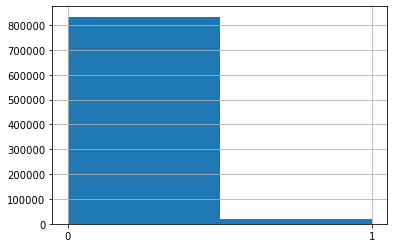

In [45]:
#Histogram 
y_train.label.hist(bins=2)

## Data Aggregations By State

In [46]:
X_train.head()

,amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5
0,12.95,0,CA,925,3,AOL.COM,1,0,1,12.95,-4276,7,0,1,0,1,1,0,1
1,11.01,0,CA,925,3,AOL.COM,1,0,1,11.01,-4276,7,0,1,0,1,1,0,1
2,38.85,0,CA,928,3,HOTMAIL.COM,1,0,0,38.85,2602,21,1,0,0,0,0,0,1
3,25.90,0,NJ,77,0,AOL.COM,1,0,0,25.9,4139,6,0,0,0,1,1,0,1
4,12.95,0,CA,945,3,YAHOO.COM,0,0,1,12.95,3826,9,1,0,0,1,0,0,1


In [47]:
X_train.dtypes

amount        float64
hour1          object
state1         object
zip1           object
field1         object
domain1        object
field2         object
hour2          object
flag1          object
total          object
field3         object
field4         object
field5         object
indicator1     object
indicator2     object
flag2          object
flag3          object
flag4          object
flag5          object
dtype: object

In [48]:
X_train = X_train.astype({"amount": float, "hour1": int})

In [49]:
X_train = X_train.astype({"state1": str, "zip1": str, 'field1': int, "domain1": str,'field2': int, "hour2": int, 'total': float})

In [50]:
X_train.dtypes

amount        float64
hour1           int32
state1         object
zip1           object
field1          int32
domain1        object
field2          int32
hour2           int32
flag1          object
total         float64
field3         object
field4         object
field5         object
indicator1     object
indicator2     object
flag2          object
flag3          object
flag4          object
flag5          object
dtype: object

In [51]:
data_train=pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test, y_test], axis=1)

In [52]:
data_train.head()

,amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5,label
0,12.95,0,CA,925,3,AOL.COM,1,0,1,12.95,-4276,7,0,1,0,1,1,0,1,0
1,11.01,0,CA,925,3,AOL.COM,1,0,1,11.01,-4276,7,0,1,0,1,1,0,1,0
2,38.85,0,CA,928,3,HOTMAIL.COM,1,0,0,38.85,2602,21,1,0,0,0,0,0,1,0
3,25.90,0,NJ,77,0,AOL.COM,1,0,0,25.90,4139,6,0,0,0,1,1,0,1,0
4,12.95,0,CA,945,3,YAHOO.COM,0,0,1,12.95,3826,9,1,0,0,1,0,0,1,0


In [53]:
# Merge data & label for preprocessing
#data_train = X_train.join(pd.get_dummies(y_train))
#data_test = X_test.join(pd.get_dummies(y_test))
print('Original data train length: ', len(data_train))
print('Original data test length: ', len(data_test))

Original data train length:  852138
Original data test length:  94682


In [54]:
# drop rows with NaN values
data_train = data_train.dropna().copy()
data_test = data_test.dropna().copy()

print('Data train length without NaN: ', len(data_train))
print('Data test length without NaN: ', len(data_test))

Data train length without NaN:  852138
Data test length without NaN:  94682


In [55]:
data_train.head()

,amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5,label
0,12.95,0,CA,925,3,AOL.COM,1,0,1,12.95,-4276,7,0,1,0,1,1,0,1,0
1,11.01,0,CA,925,3,AOL.COM,1,0,1,11.01,-4276,7,0,1,0,1,1,0,1,0
2,38.85,0,CA,928,3,HOTMAIL.COM,1,0,0,38.85,2602,21,1,0,0,0,0,0,1,0
3,25.90,0,NJ,77,0,AOL.COM,1,0,0,25.90,4139,6,0,0,0,1,1,0,1,0
4,12.95,0,CA,945,3,YAHOO.COM,0,0,1,12.95,3826,9,1,0,0,1,0,0,1,0


In [56]:
data_train.dtypes

amount        float64
hour1           int32
state1         object
zip1           object
field1          int32
domain1        object
field2          int32
hour2           int32
flag1          object
total         float64
field3         object
field4         object
field5         object
indicator1     object
indicator2     object
flag2          object
flag3          object
flag4          object
flag5          object
label          object
dtype: object

In [57]:
data_train = data_train.astype({"label": int})
data_test = data_test.astype({"label": int})

In [59]:
fraud_by_state=data_train['label'].groupby(data_train['state1']).sum().reset_index().sort_values('label', ascending=False)
fraud_by_state

,state1,label
6,CA,4257
11,FL,1881
5,AZ,1602
45,TX,1116
47,VA,972
25,MN,720
44,TN,666
36,NY,657
12,GA,603
20,LA,603


In [60]:
aggregations = {
    'amount':'count',
    'label': 'sum'
#     'class' : lambda x: sum(x)
  }
fraud_by_state_devided_by_transactions=data_train.groupby('state1',as_index=False).agg(aggregations)
fraud_by_state_devided_by_transactions['fraud_per_totnum']=fraud_by_state_devided_by_transactions['label']/fraud_by_state_devided_by_transactions['amount']*100
fraud_by_state_devided_by_transactions.sort_values('fraud_per_totnum',ascending=False).head()

,state1,amount,label,fraud_per_totnum
25,MN,11502,720,6.259781
20,LA,10476,603,5.756014
5,AZ,29124,1602,5.500618
44,TN,12474,666,5.339105
41,RI,2007,72,3.587444


In [63]:
data_plotly = [ dict(
        type='choropleth',
        autocolorscale = True,
        locations = fraud_by_state_devided_by_transactions['state1'],
        z = fraud_by_state_devided_by_transactions['fraud_per_totnum'],
        locationmode = 'USA-states',
        text = fraud_by_state_devided_by_transactions['state1'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Number of fraud Transactions per <br>total number of transactions")
        ) ]

layout = dict(
        title = 'Total Number of fradulant transactions per <br>total number of transactions in each state <br>',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )

fig = dict( data=data_plotly, layout=layout )
py.iplot( fig, filename='No_of_fraud_transaction_per_transaction-map' )

In [64]:
# Label Encoding non-numerical feature
le = LabelEncoder()
data_train['state1'] = le.fit_transform(data_train['state1'])
data_train['domain1'] = le.fit_transform(data_train['domain1'])

data_test['state1'] = le.fit_transform(data_test['state1'])
data_test['domain1'] = le.fit_transform(data_test['domain1'])
 
display(data_train.head())

,amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5,label
0,12.95,0,6,925,3,277,1,0,1,12.95,-4276,7,0,1,0,1,1,0,1,0
1,11.01,0,6,925,3,277,1,0,1,11.01,-4276,7,0,1,0,1,1,0,1,0
2,38.85,0,6,928,3,3022,1,0,0,38.85,2602,21,1,0,0,0,0,0,1,0
3,25.90,0,33,77,0,277,1,0,0,25.90,4139,6,0,0,0,1,1,0,1,0
4,12.95,0,6,945,3,9147,0,0,1,12.95,3826,9,1,0,0,1,0,0,1,0


In [65]:
data_train.dtypes

amount        float64
hour1           int32
state1          int32
zip1           object
field1          int32
domain1         int32
field2          int32
hour2           int32
flag1          object
total         float64
field3         object
field4         object
field5         object
indicator1     object
indicator2     object
flag2          object
flag3          object
flag4          object
flag5          object
label           int32
dtype: object

In [66]:
data_train.convert_dtypes().dtypes
data_test.convert_dtypes().dtypes

AttributeError: 'DataFrame' object has no attribute 'convert_dtypes'

In [67]:
data_train = data_train.astype({"flag1": int, 'field3': int, 'field4': int, 'field5': int, "indicator1": int,'indicator2': int, "flag2": int,"flag3": int, "flag4": int, "flag5": int})
data_test = data_test.astype({"flag1": int, 'field3': int, 'field4': int, 'field5': int, "indicator1": int,'indicator2': int, "flag2": int,"flag3": int, "flag4": int, "flag5": int})

In [68]:
# data_train correlation
corr = data_train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,amount,hour1,state1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5,label
amount,1,0.015,0.00042,-0.081,-0.0017,0.01,0.015,-0.21,1,-0.078,0.069,-0.056,-0.024,-0.014,0.098,0.015,-0.034,-0.079,-0.024
hour1,0.015,1,-0.014,-0.0019,-0.011,0.01,0.99,-0.041,0.015,0.0084,0.012,-0.011,0.00056,-0.0085,-0.015,-0.013,-0.013,-0.017,-0.16
state1,0.00042,-0.014,1,-0.015,0.014,0.0049,-0.014,-0.026,0.00047,0.034,0.019,0.0034,-0.018,0.003,0.0064,-0.00071,-0.002,0.019,-0.017
field1,-0.081,-0.0019,-0.015,1,0.013,0.041,-0.0019,-0.025,-0.082,0.088,-0.0089,0.025,0.033,0.0015,0.014,0.046,0.041,0.071,0.092
domain1,-0.0017,-0.011,0.014,0.013,1,-0.0077,-0.011,-0.018,-0.0013,0.11,0.069,-0.016,0.052,0.012,-0.019,-0.023,-0.02,-0.044,-0.0052
field2,0.01,0.01,0.0049,0.041,-0.0077,1,0.0095,-0.088,0.01,0.027,0.074,-0.024,0.011,0.003,0.013,-0.0035,-0.022,0.01,-0.0041
hour2,0.015,0.99,-0.014,-0.0019,-0.011,0.0095,1,-0.042,0.015,0.0078,0.012,-0.012,0.00078,-0.0079,-0.015,-0.012,-0.013,-0.017,-0.16
flag1,-0.21,-0.041,-0.026,-0.025,-0.018,-0.088,-0.042,1,-0.21,0.052,-0.46,0.18,0.011,0.029,-0.0033,-0.0057,0.093,-0.029,-0.025
total,1,0.015,0.00047,-0.082,-0.0013,0.01,0.015,-0.21,1,-0.078,0.069,-0.056,-0.024,-0.014,0.098,0.015,-0.034,-0.082,-0.024
field3,-0.078,0.0084,0.034,0.088,0.11,0.027,0.0078,0.052,-0.078,1,0.019,-0.0092,0.13,-0.0062,-0.039,-0.02,-0.028,-0.0098,-0.066


In [69]:
data_train.dtypes

amount        float64
hour1           int32
state1          int32
zip1           object
field1          int32
domain1         int32
field2          int32
hour2           int32
flag1           int32
total         float64
field3          int32
field4          int32
field5          int32
indicator1      int32
indicator2      int32
flag2           int32
flag3           int32
flag4           int32
flag5           int32
label           int32
dtype: object

In [71]:
# data_train correlation
corr = data_train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,amount,hour1,state1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5,label
amount,1,0.015,0.00042,-0.081,-0.0017,0.01,0.015,-0.21,1,-0.078,0.069,-0.056,-0.024,-0.014,0.098,0.015,-0.034,-0.079,-0.024
hour1,0.015,1,-0.014,-0.0019,-0.011,0.01,0.99,-0.041,0.015,0.0084,0.012,-0.011,0.00056,-0.0085,-0.015,-0.013,-0.013,-0.017,-0.16
state1,0.00042,-0.014,1,-0.015,0.014,0.0049,-0.014,-0.026,0.00047,0.034,0.019,0.0034,-0.018,0.003,0.0064,-0.00071,-0.002,0.019,-0.017
field1,-0.081,-0.0019,-0.015,1,0.013,0.041,-0.0019,-0.025,-0.082,0.088,-0.0089,0.025,0.033,0.0015,0.014,0.046,0.041,0.071,0.092
domain1,-0.0017,-0.011,0.014,0.013,1,-0.0077,-0.011,-0.018,-0.0013,0.11,0.069,-0.016,0.052,0.012,-0.019,-0.023,-0.02,-0.044,-0.0052
field2,0.01,0.01,0.0049,0.041,-0.0077,1,0.0095,-0.088,0.01,0.027,0.074,-0.024,0.011,0.003,0.013,-0.0035,-0.022,0.01,-0.0041
hour2,0.015,0.99,-0.014,-0.0019,-0.011,0.0095,1,-0.042,0.015,0.0078,0.012,-0.012,0.00078,-0.0079,-0.015,-0.012,-0.013,-0.017,-0.16
flag1,-0.21,-0.041,-0.026,-0.025,-0.018,-0.088,-0.042,1,-0.21,0.052,-0.46,0.18,0.011,0.029,-0.0033,-0.0057,0.093,-0.029,-0.025
total,1,0.015,0.00047,-0.082,-0.0013,0.01,0.015,-0.21,1,-0.078,0.069,-0.056,-0.024,-0.014,0.098,0.015,-0.034,-0.082,-0.024
field3,-0.078,0.0084,0.034,0.088,0.11,0.027,0.0078,0.052,-0.078,1,0.019,-0.0092,0.13,-0.0062,-0.039,-0.02,-0.028,-0.0098,-0.066


In [72]:
# data_test correlation
corr = data_test.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,state1,domain1,flag1,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5,label
state1,1,0.014,-0.026,0.034,0.019,0.0034,-0.018,0.003,0.0064,-0.00071,-0.002,0.019,-0.017
domain1,0.014,1,-0.018,0.11,0.069,-0.016,0.052,0.012,-0.019,-0.023,-0.02,-0.044,-0.0052
flag1,-0.026,-0.018,1,0.052,-0.46,0.18,0.011,0.029,-0.0033,-0.0057,0.093,-0.029,-0.025
field3,0.034,0.11,0.052,1,0.019,-0.0092,0.13,-0.0062,-0.039,-0.02,-0.028,-0.0098,-0.066
field4,0.019,0.069,-0.46,0.019,1,-0.17,-0.0095,-0.011,0.045,0.039,-0.1,-0.025,-0.057
field5,0.0034,-0.016,0.18,-0.0092,-0.17,1,-0.015,0.0042,0.0033,0.034,0.18,0.0091,0.023
indicator1,-0.018,0.052,0.011,0.13,-0.0095,-0.015,1,-0.048,-0.0019,-0.0014,-0.0056,-0.0029,0.018
indicator2,0.003,0.012,0.029,-0.0062,-0.011,0.0042,-0.048,1,-0.0092,-0.018,-0.006,0.017,0.003
flag2,0.0064,-0.019,-0.0033,-0.039,0.045,0.0033,-0.0019,-0.0092,1,0.46,-0.0068,0.042,0.0078
flag3,-0.00071,-0.023,-0.0057,-0.02,0.039,0.034,-0.0014,-0.018,0.46,1,0.01,0.056,0.079


In [73]:
# Split data & label after preprocessing

y_train = pd.DataFrame()
y_train['label'] = data_train.iloc[:,-1]

y_test = pd.DataFrame()
y_test['label'] = data_test.iloc[:,-1]

X_train = data_train.copy()
X_test = data_test.copy()

In [74]:
X_train.head()

,amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5,label
0,12.95,0,6,925,3,277,1,0,1,12.95,-4276,7,0,1,0,1,1,0,1,0
1,11.01,0,6,925,3,277,1,0,1,11.01,-4276,7,0,1,0,1,1,0,1,0
2,38.85,0,6,928,3,3022,1,0,0,38.85,2602,21,1,0,0,0,0,0,1,0
3,25.90,0,33,77,0,277,1,0,0,25.90,4139,6,0,0,0,1,1,0,1,0
4,12.95,0,6,945,3,9147,0,0,1,12.95,3826,9,1,0,0,1,0,0,1,0


In [75]:
# normalized numerical data
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_data = []
for key in X_train.iteritems() :
    if (len(X_train[key[0]].unique()) > 6) :
        num_data.append(key[0])
        
X_train[num_data] = minmax_scale(X_train[num_data])
X_test[num_data] = minmax_scale(X_test[num_data])
X_test.describe()

,amount,hour1,state1,zip1,domain1,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5,label
count,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000
mean,0.268714,0.602814,0.436761,0.542872,0.412448,0.603298,0.546989,0.268618,0.815154,0.199603,0.052911,0.113306,0.018367,0.541127,0.401185,0.019888,0.001884,0.022116
std,0.148747,0.228836,0.297048,0.316323,0.338857,0.228623,0.497790,0.148834,0.096874,0.162921,0.093229,0.316968,0.134274,0.498308,0.490141,0.139615,0.031415,0.147062
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.135744,0.434783,0.115385,0.280843,0.098073,0.478261,0.000000,0.135744,0.759158,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000305,0.000000
50%,0.271488,0.608696,0.384615,0.529589,0.308084,0.608696,1.000000,0.271488,0.833457,0.150000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000305,0.000000
75%,0.407233,0.782609,0.692308,0.891675,0.728795,0.782609,1.000000,0.407233,0.886425,0.325000,0.076923,0.000000,0.000000,1.000000,1.000000,0.000000,0.000305,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
# undersampling train data
from imblearn.under_sampling import NearMiss

nr = NearMiss()
train_data, train_label = nr.fit_sample(X_train, y_train)
np.bincount(train_label)

ValueError: object too deep for desired array

In [ ]:
##Random Forest Model

In [77]:
# Create model, fit, and score

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(n_estimators=100, max_depth=2)
clf.fit(train_data, train_label)

y_true = y_test
y_pred = clf.predict(X_test)
print('Confusion matrix : \n', confusion_matrix(y_true, y_pred))
print('Accuracy : ', clf.score(X_test, y_test))
print("F1 Score : ", f1_score(y_true, y_pred, average='macro'))



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Confusion matrix : 
 [[92572    16]
 [    0  2094]]
Accuracy :  0.9998310132865803
F1 Score :  0.9980538445521646


In [79]:
# View the classification report for test data and predictions
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     92588
           1       0.99      1.00      1.00      2094

    accuracy                           1.00     94682
   macro avg       1.00      1.00      1.00     94682
weighted avg       1.00      1.00      1.00     94682



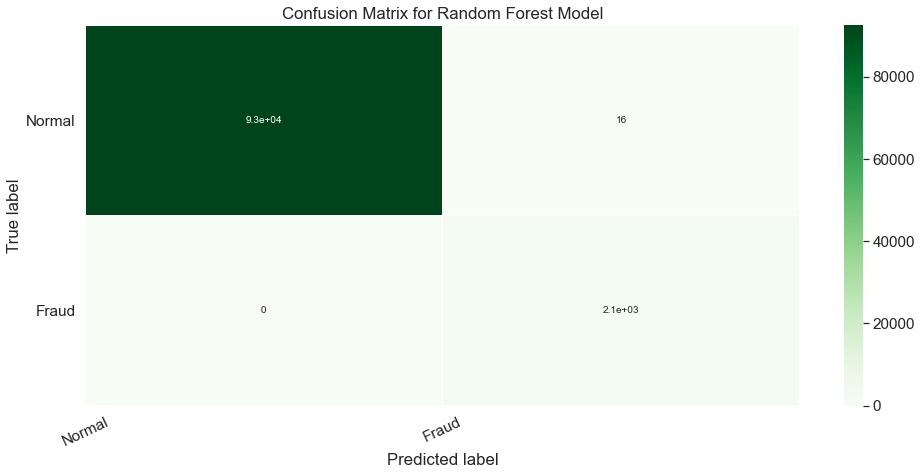

In [82]:
import seaborn as sns
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)
#matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Normal', 'Fraud']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

<AxesSubplot:>

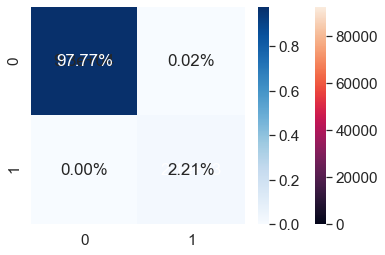

In [84]:
import seaborn as sns
cf_matrix=confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix, annot=True)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

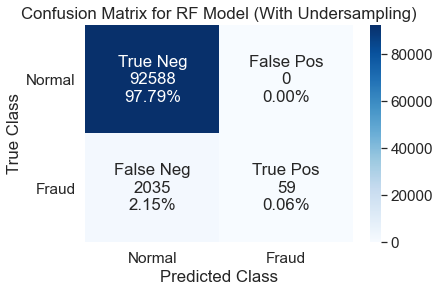

In [116]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

class_names = ['Normal', 'Fraud']
tick_marks = np.arange(len(class_names))+ 0.5
tick_marks2 = tick_marks 
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix for RF Model (With Undersampling)')
plt.show()

In [ ]:
# Average score from 100 training
acc = []
f1score = []
falsePrediction = []

for i in range(100):
    clf.fit(train_data, train_label)

    y_pred = clf.predict(X_test)
    
    conf = confusion_matrix(y_true, y_pred)
    
    acc.append(clf.score(X_test, y_test))
    f1score.append(f1_score(y_true, y_pred, average='macro'))
    falsePrediction.append(conf[0,1])
    falsePrediction.append(conf[1,0])

    
print("Average accuracy : ", sum(acc) / len(acc))
print("F1-Score accuracy : ", sum(f1score) / len(f1score))
print("Total false prediction : ", sum(falsePrediction))
print("Average false prediction : ", sum(falsePrediction) / len(falsePrediction))

In [108]:
# Model score without undersampling the dataset

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=2)
clf.fit(X_train, y_train.values.ravel())
clf.score(X_test, y_test)

y_true = y_test
y_pred = clf.predict(X_test)
print(confusion_matrix(y_true, y_pred))
print('Accuracy without undersampling: ', clf.score(X_test, y_test))

print('F1-Score without undersampling: ', f1_score(y_true, y_pred, average='macro'))

[[92588     0]
 [ 2035    59]]
Accuracy without undersampling:  0.9785070023869373
F1-Score without undersampling:  0.5219685789708661


In [90]:
# View the classification report for test data and predictions
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     92588
           1       1.00      0.10      0.18      2094

    accuracy                           0.98     94682
   macro avg       0.99      0.55      0.58     94682
weighted avg       0.98      0.98      0.97     94682



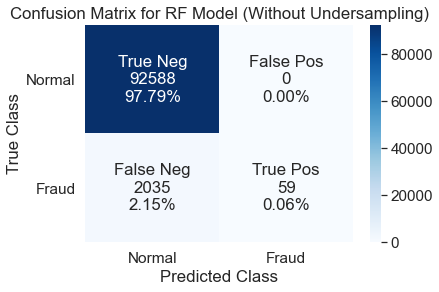

In [115]:
import seaborn as sns
cf_matrix=confusion_matrix(y_true, y_pred)
#sns.heatmap(cf_matrix, annot=True)
#sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
#            fmt='.2%', cmap='Blues')
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

class_names = ['Normal', 'Fraud']
tick_marks = np.arange(len(class_names))+ 0.5
tick_marks2 = tick_marks 
plt.xticks(tick_marks, class_names, rotation=0)
#plt.xticks.set_horizontalalignment('center')
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix for RF Model (Without Undersampling)')
plt.show()

In [ ]:
#Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression
#from pandas_ml import ConfusionMatrix
from sklearn.metrics import classification_report
from sklearn.metrics import jaccard_score


# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from sklearn.impute import SimpleImputer
SimpleImputer(missing_values=np.nan, strategy='mean')


model_logistic = LogisticRegression(random_state=42)
model_logistic.fit(train_data, train_label.values.ravel())
predict = model_logistic.predict(X_test)
y_predicted = np.round(predict)
#Confusion_Matrix = ConfusionMatrix(y_val, y_predicted)
#print(Confusion_Matrix)
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     92588
           1       1.00      1.00      1.00      2094

    accuracy                           1.00     94682
   macro avg       1.00      1.00      1.00     94682
weighted avg       1.00      1.00      1.00     94682



In [ ]:
#Support Vector Machine

In [104]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
model_SVC = SVC(random_state=42)
model_SVC.fit(X_train, y_train.values.ravel())
predict = model_SVC.predict(X_test)
y_predicted = np.round(predict)

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     92588
           1       1.00      1.00      1.00      2094

    accuracy                           1.00     94682
   macro avg       1.00      1.00      1.00     94682
weighted avg       1.00      1.00      1.00     94682



In [106]:
from sklearn.neural_network import MLPRegressor, MLPClassifier
#from pandas_ml import ConfusionMatrix
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer 
SimpleImputer(missing_values=np.nan, strategy='mean')

model_MPC = MLPClassifier()
model_MPC.fit(X_train, y_train.values.ravel())
predict = model_MPC.predict(X_test)
y_predicted = np.round(predict)
#Confusion_Matrix = ConfusionMatrix(y_val, y_predicted)
#print(Confusion_Matrix)
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     92588
           1       1.00      1.00      1.00      2094

    accuracy                           1.00     94682
   macro avg       1.00      1.00      1.00     94682
weighted avg       1.00      1.00      1.00     94682

